In [1]:
from typing import TypedDict

class State(TypedDict):
    customer_name: str
    my_age: int

In [8]:
def node_1(state: State):
    return state

def node_2(state: State):
    return state

def node_3(state: State):
    return state

def node_4(state: State):
    return state

In [3]:
from typing import Literal
from random import random 

def router_edge(state: State) -> Literal["node_2", "node_3"]:
    if random() < 0.5:
        return "node_2"
    else:
        return "node_3"

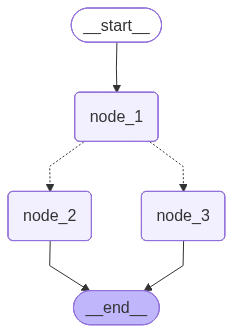

In [7]:
from langgraph.graph import StateGraph, START, END, MessagesState
from IPython.display import Image, display

builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", router_edge)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

agent = builder.compile()

display(Image(agent.get_graph().draw_mermaid_png()))

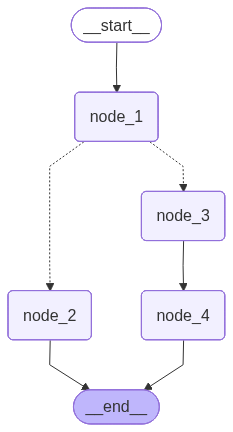

In [10]:
from langgraph.graph import StateGraph, START, END, MessagesState
from IPython.display import Image, display

builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", router_edge)
builder.add_edge("node_2", END)
builder.add_edge("node_3", "node_4")
builder.add_edge("node_4", END)

agent = builder.compile()

display(Image(agent.get_graph().draw_mermaid_png()))

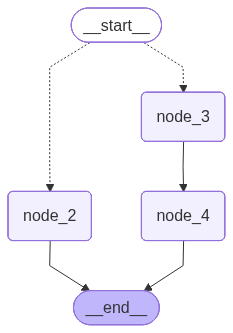

In [11]:
from langgraph.graph import StateGraph, START, END, MessagesState
from IPython.display import Image, display

builder = StateGraph(State)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)

builder.add_conditional_edges(START, router_edge)
builder.add_edge("node_2", END)
builder.add_edge("node_3", "node_4")
builder.add_edge("node_4", END)

agent = builder.compile()

display(Image(agent.get_graph().draw_mermaid_png()))

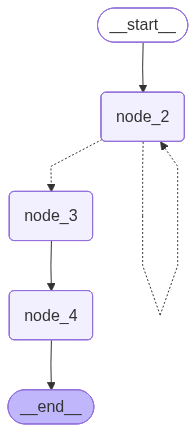

In [12]:
from langgraph.graph import StateGraph, START, END, MessagesState
from IPython.display import Image, display

builder = StateGraph(State)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)

builder.add_edge(START, "node_2")
builder.add_conditional_edges("node_2", router_edge)
builder.add_edge("node_2", END)
builder.add_edge("node_3", "node_4")
builder.add_edge("node_4", END)

agent = builder.compile()

display(Image(agent.get_graph().draw_mermaid_png()))

In [24]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("openai:gpt-4.1-mini", temperature=0.3)
llm = llm.invoke( [("system", "you are a helpful assistant")] + [("user", "hola")])
llm

AIMessage(content='¡Hola! ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 17, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_75546bd1a7', 'id': 'chatcmpl-D6GNzK85PnwD6zTMdPfXY2XC4fbTa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c3330-4755-73a3-914a-15aa53f25dfe-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 17, 'output_tokens': 10, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})